# Clustering --> PCA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes, load_boston

In [2]:
markers = ['s', 'o', '^', 'P', 'H', 'x']

### Iris data

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.to_csv('../static/model/iris.csv', index=False)

In [5]:
df = pd.read_csv('../static/model/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1].values
X_scaled.shape, y.shape

((150, 4), (150,))

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df['target'] = y

In [8]:
K_number = 3

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K_number, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=2021)

In [10]:
df['cluster'] = kmeans.labels_
df.head()

,pca_x,pca_y,target,cluster
0,-2.264703,0.480027,0,0
1,-2.080961,-0.674134,0,0
2,-2.364229,-0.341908,0,0
3,-2.299384,-0.597395,0,0
4,-2.389842,0.646835,0,0


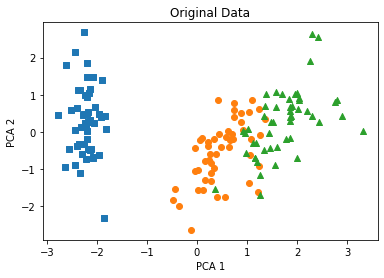

In [11]:
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

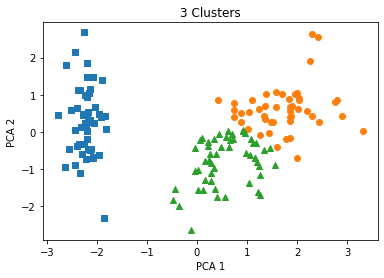

In [12]:
for i in range(K_number):
    marker = markers[i]
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title(f'{K_number} Clusters')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

### Wine data

In [13]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.to_csv('../static/model/wine.csv', index=False)

In [14]:
df = pd.read_csv('../static/model/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
# 전처리 - 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1].values
# 차원 축소
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df['target'] = y
# 군집화
K_number = 3
kmeans = KMeans(n_clusters=K_number, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

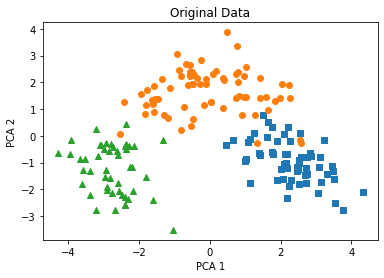

In [16]:
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

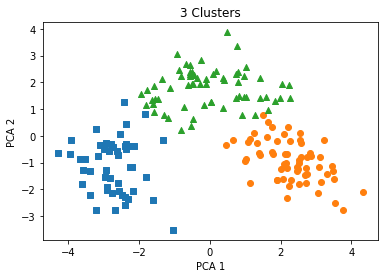

In [17]:
for i in range(K_number):
    marker = markers[i]
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title(f'{K_number} Clusters')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

### 유방암 data

In [18]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.to_csv('../static/model/cancer.csv', index=False)

In [19]:
df = pd.read_csv('../static/model/cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
# 전처리 - 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1].values
# 차원 축소
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df['target'] = y
# 군집화
K_number = 3
kmeans = KMeans(n_clusters=K_number, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

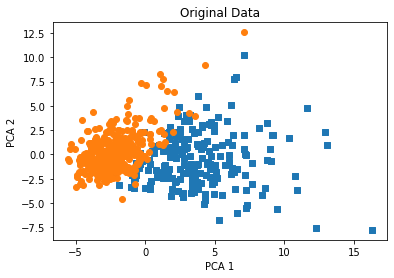

In [21]:
# Original 데이터
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

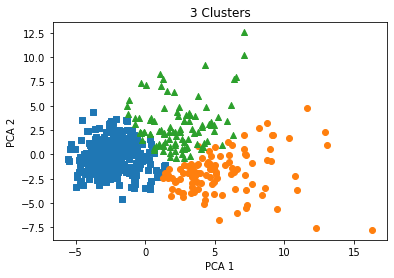

In [22]:
# Clustered 데이터
for i in range(K_number):
    marker = markers[i]
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title(f'{K_number} Clusters')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

### 당뇨병 data

In [23]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.to_csv('../static/model/diabetes.csv', index=False)

In [24]:
df = pd.read_csv('../static/model/diabetes.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Boston data

In [25]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

df.to_csv('../static/model/boston.csv', index=False)

In [26]:
df = pd.read_csv('../static/model/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
